# 15 UNDERSTANDING EXPERIMENTAL DATA

This chapter is all about <b>understanding experimental data</b>. 

We will make extensive use of plotting to visualize the data, and will return to the topic of what is and what is not a valid statistical conclusion. We will also talk about the interplay between physical and computational experiments.

## 15.1 The Behavior of Springs

Springs are wonderful things. 

In 1676 the British physicist Robert Hooke formulated <b>Hooke’s law</b> of elasticity: Ut tensio, sic vis, in English,

`F = -kx`

All springs have an <b>elastic limit</b>, beyond which the law fails. 

The constant of proportionality, `k`, is called <b>the spring constant</b>.

Knowing the <b>spring constant</b> of a particular spring can be <b>a matter of some import</b>

Generations of physics students have learned to estimate spring constants using an experimental apparatus similar to that pictured here. 

The basic idea is toestimate the force stored in the spring by <b>measuring the displacement caused by exerting a known force on the spring</b>.

<img src="./img/spring.PNG"/> 

In [ ]:
#Page 209, Figure 15.1
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, m = line.split(' ')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

The function in Figure 15.2 uses getData to extract the experimental data from  the file and then plots it.

Plotting the data

In [ ]:
%matplotlib inline
import pylab
#Page 209, Figure 15.2
def plotData(inputFile):
    masses, distances = getData(inputFile)
    masses = pylab.array(masses)
    distances = pylab.array(distances)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
               label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
plotData('springData.txt')

This is not what Hooke’s law predicts

Measurement error is to be expected, so we should expect the points to lie around a line rather than on it.

It would be nice to see a line that represents <b>our best guess</b> of where the points would have been <b>if we had no measurement error</b>. 

This is to <b>fit a line to the data</b>.



### 15.1.1 Using Linear Regression to Find a Fit

<b>Objective function</b> provides a quantitative assessment of how well the curve fits the data.

The most commonly used objective function is called <b>least squares</b>,The objective function is then defined as

$\sum_{i=0}^{len(observed)-1}(observed[i]-predicted[i])^2$

`PyLab` provides a built-in function, `polyfit`, that finds the best least-squares fit.
```python
pylab.polyfit(observedXVals, observedYVals, n)

pylab.polyfit(observedXVals, observedYVals, 1) # y = ax + b

pylab.polyfit(observedXVals, observedYVals, 2) # y = ax^2 + bx+c
```
The algorithm used by polyfit is called <b>linear regression</b>.

The function fitData in Figure 15.3 extends the `plotData` function in Figure 15.2 by adding a line that represents the best fit for the data.

The function also computes the spring constant, `k`.

There is an asymmetry in the way `forces` and `distance` are treated. 

The values in `forces` are treated as <b>independent</b>,and used to produce the values in <b>the dependent variable</b> `predictedDistances` (a prediction of the displacements produced by suspending the mass).


It is interesting to observe that <b>very few points</b> actually lie on the least-squares fit.

It doesn’t look like a great fit. Let’s try a `cubic fit` by adding to `fitData`

In [ ]:
#Page 212, Figure 15.3
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
               label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
    #find linear fit
    a,b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces) + b
    
    # the spring constant, k
    k = 1.0/a
    
    pylab.plot(forces, predictedDistances,
               label = 'Displacements predicted by\nlinear fit, k = '
               + str(round(k, 5)))
   
    #add cubit fit
  
    a,b,c,d = pylab.polyfit(forces, distances, 3)
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    pylab.plot(forces, predictedDistances, 'b:', label = 'cubic fit')

    pylab.legend(loc = 'best')

fitData('springData.txt')
    

The cubic fit <b>looks like</b> a much better model of the data, but is it? <b>Probably not</b>.

The <b>raw data</b> merely an indication of <b>experimental error</b>. This can be dangerous.

Recall that we started with a theory that there should be <b>a linear relationship</b> between the x and y values, not
a cubic one.

Let’s see what happens if we use our cubic fit to predict where the point corresponding to <b>1.5kg</b> would lie.


In [ ]:
#Page 212, Figure 15.3
%matplotlib inline
import pylab
def fitData(inputFile):
    masses, distances = getData(inputFile)
   
    # predict where the point corresponding to 1.5kg would lie  
    outsidepoints=[1.1,1.2,1.3,1.4,1.5]
    masses=masses+outsidepoints
    
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    
    forces = masses*9.81
    pylab.plot(forces[:-5], distances, 'bo',
               label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
   
    #add cubit fit
    a,b,c,d = pylab.polyfit(forces[:-5], distances, 3)
    
    # predict where the point corresponding to 1.5kg would lie  
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    pylab.plot(forces, predictedDistances, 'b:', label = 'cubic fit')

    pylab.legend(loc = 'best')

fitData('springData.txt')
    

we have is an example of <b>overfitting</b>.

we recall that <b>Hooke’s law</b> holds only up to some <b>elastic limit</b>. Perhaps that limit is reached for this spring somewhere around <b>7N</b> (approximately 0.7kg).

Let’s see what happens if we eliminate the last six points by replacing the second and third lines of fitData by

```python
distances = pylab.array(distances[:-6])
masses = pylab.array(masses[:-6])
```


In [ ]:
#Page 212, Figure 15.3
def fitData(inputFile):
    masses, distances = getData(inputFile)
    
    # we eliminate the last six points
    distances = pylab.array(distances[:-6])
    masses = pylab.array(masses[:-6])
        
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
               label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    
    #find linear fit
    a,b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*pylab.array(forces) + b
    
    # the spring constant, k
    k = 1.0/a
    
    pylab.plot(forces, predictedDistances,
               label = 'Displacements predicted by\nlinear fit, k = '
               + str(round(k, 5)))
   
    #add cubit fit
  
    a,b,c,d = pylab.polyfit(forces, distances, 3)
    predictedDistances = a*(forces**3) + b*forces**2 + c*forces + d
    pylab.plot(forces, predictedDistances, 'r:', label = 'cubic fit')

    pylab.legend(loc = 'best')

fitData('springData.txt')

Eliminating those points certainly makes a <b>difference</b>, e.g., k has dropped dramatically and the linear and cubic fits are almost  <b>indistinguishable</b>. 

But how do we know which of the two linear fits is a better representation of how our spring performs up to its elastic limit? 

One should never throw out experimental results <b>merely to get a better fit</b>. 


## 15.2 The Behavior of Projectiles

We decided to use one of our springs to build a device capable of launching a projectile.

We measured <b>the height of the projectile at various distances from the launch point</b>.

The data was stored in a file with the contents

```
      Distance trial1  trial2 trial3  trial4
      1080     0        0      0       0
      1044     2.25     3.25   4.5     6.5
      
      
      0        0        0       0       0
```
The code in Figure 15.4 was used to plot the mean altitude of the projectile against the distance from the point of launch. It also plots the best linear and quadratic fits to the points.

In [ ]:
#Page 215, Figure 15.4
%matplotlib inline
import pylab
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    #Get array containing mean height at each distance
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights/len(heights)
    pylab.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'b', label = 'Linear Fit')
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) +  b*distances + c
    pylab.plot(distances, altitudes, 'b:', label = 'Quadratic Fit')
    pylab.legend()
    
processTrajectories('projectileData.txt')

A quick look at the plot on the right makes it quite clear that a quadratic fit is far better than a linear one

#####  how bad a fit is the line and how good is the quadratic fit?

### 15.2.1 Coefficient of Determination

Asking about <b>the goodness of a fit</b> is equivalent to asking about the accuracy of these predictions.

<b>The mean square error</b> is useful for comparing the <b>relative goodness</b> of two fits to the same data, it is <b>not particularly useful for getting a sense of the absolute goodness of a fit</b>.

We can calculate <b>the absolute goodness of a fit</b> using the <b>coefficient of determination</b>, often written as $R^2$

Let $y_i$ be the $i^{th}$ observed value, $p_i$ be the corresponding value predicted by model, and $\mu$ be the mean of the observed values.

$R^2=1-\frac{\sum_{i}(y_i-p_i)^2}{\sum_{i}(y_i-\mu)^2}$

By comparing <b>the estimation errors</b> (<b>RSS: residual sum of squares</b>,the numerator) with <b>the variability of the original values</b> ( <b>TSS: total sum of squares</b>,the denominator), $R^2$ is intended to capture <b>the proportion of variability </b> in a data set that is accounted for by the statistical model provided by the fit.

Its <b>compactness</b> stems from the expressiveness of the operations on <b>arrays</b>.

In [ ]:
#Page 216, Figure 15.5
def rSquared(measured, predicted):
    """Assumes measured a one-dimensional array of measured values
               predicted a one-dimensional array of predicted values
       Returns coefficient of determination"""
    # RSS: residual sum of squares
    estimateError = ((predicted - measured)**2).sum()
    
    meanOfMeasured = measured.sum()/float(len(measured))
    
    # TSS: total sum of squares
    variability = ((measured - meanOfMeasured)**2).sum()
    return 1 - estimateError/variability

In [ ]:
#Page 215, Figure 15.4
%matplotlib inline
import pylab
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    #Get array containing mean height at each distance
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights/len(heights)
    pylab.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    
    r2linear=rSquared(meanHeights, altitudes)
        
    pylab.plot(distances, altitudes, 'b', label = 'Linear Fit, $R^2$='+str(r2linear))
    
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) +  b*distances + c
    
    r2quad=rSquared(meanHeights, altitudes)
        
    pylab.plot(distances, altitudes, 'b:', label = 'Quadratic Fit, $R^2$='+str(r2quad))
    
    pylab.legend()
    
processTrajectories('projectileData.txt')

This tells us that 

1 less than 2% of the variation in the measured data can be explained by the linear model,

2 ore than 98% of the  variation can be explained by the quadratic model

### 15.2.2 Using a Computational Mode

One interesting question is <b>the horizontal speed</b> at which the projectile is traveling when it hits the target. 

We might use the following train of thought to design <b>a computation</b> that answers this question:
    

1 Its <b>peak</b> occurs halfway  between the launch point and the target; call this value $xMid$. 
The peak height, 

 $yPeak=a*xMid^2+b*xMid+c$
 
2  we can compute <b>the amount of time</b> it takes for the projectile to <b>fall from $yPeak$ to
the height of the target</b>, because that is purely a function of gravity. It is  given by the equation:

$t=\sqrt{\frac{2*yPeak}{g}}$

https://en.wikipedia.org/wiki/Equations_for_a_falling_body

3 Given the time to go from $xMid$ to the target, we can easily compute the average horizontal speed of the projectile over that interval. 
we can use the average horizontal speed as an estimate of the horizontal speed when the projectile hits the target
  

In [ ]:
#Page 218, Figure 15.6
def getHorizontalSpeed(a, b, c, minX, maxX):
    """Assumes minX and maxX are distances in inches
       Returns horizontal speed in feet per second"""
    inchesPerFoot = 12.0
    
    xMid = (maxX - minX)/2.0
    yPeak = a*xMid**2 + b*xMid + c
    
    g = 32.16*inchesPerFoot #accel. of gravity in inches/sec/sec
    
    t = (2*yPeak/g)**0.5
    print('Horizontal speed =', int(xMid/(t*inchesPerFoot)), 'feet/sec')


In [ ]:
#Page 215, Figure 15.4
%matplotlib inline
import pylab
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    #Get array containing mean height at each distance
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights/len(heights)
    pylab.title('Trajectory of Projectile (Mean of '\
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    
    r2linear=rSquared(meanHeights, altitudes)
        
    pylab.plot(distances, altitudes, 'b', label = 'Linear Fit, $R^2$='+str(r2linear))
    
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) +  b*distances + c
    
    r2quad=rSquared(meanHeights, altitudes)
        
    pylab.plot(distances, altitudes, 'b:', label = 'Quadratic Fit, $R^2$='+str(r2quad))
    
    pylab.legend()
    
    getHorizontalSpeed(a, b, c, distances[-1],distances[0])
    
processTrajectories('projectileData.txt')

The sequence of steps we have just worked through follows <b>a common pattern</b> 

1.  We started by performing <b>an experiment</b> to get some data about <b>the behavior</b> of a physical system.

2. We then used computation to <b>find</b> and <b>evaluate</b> the quality of <b>a model</b> of the behavior of the system.

3. Finally, we used some <b>theory and analysis</b> to design a simple <b>computation</b> to derive an interesting <b>consequence of the model</b>.

## 15.3 Fitting Exponentially Distributed Data 

Polyfit uses linear regression to find a polynomial of a given degree that is the best least-squares fit for some data. 

But this is not always possible. Consider, for example, the simple <b>exponential growth function</b> $y = 2^x$.

The code in Figure 15.7 fits a 4th-degree polynomial to the first ten points and plots the results.

In [ ]:
#Page 218, Figure 15.7
%matplotlib inline
import pylab
vals = []
for i in range(10):
    vals.append(2**i)
pylab.plot(vals,'bo', label = 'Actual points')

xVals = pylab.arange(10)
a,b,c,d,e = pylab.polyfit(xVals, vals, 4)
yVals = a*(xVals**4) + b*(xVals**3) + c*(xVals**2)+ d*xVals + e
pylab.plot(yVals, 'bx', label = 'Predicted points', markersize = 20)
pylab.title('Fitting $y = 2^x$')
pylab.legend()


The fit is clearly a good one, for these data points. However, let’s look at what  the model predicts for $2^{20}$

In [ ]:
pred2to20 = a*(20**4) + b*(20**3) + c*(20**2)+ d*20 + e
print('Model predicts that 2**20 is roughly', round(pred2to20))
print('Actual value of 2**20 is', 2**20)

##### It is because no polynomial is a good fit for an exponential distribution.

we can use polyfit to find a curve that fits the original independent values and the <b>log</b> of the dependent values

If a function $y = f(x)$, exhibits exponential growth, the $log$ (to any base) of $f(x)$ grows linearly. 

This can be visualized by plotting an exponential function with a logarithmic y-axis.

In [ ]:
xVals, yVals = [], []
for i in range(10):
    xVals.append(i)
    yVals.append(2**i)
pylab.plot(xVals, yVals)
pylab.semilogy()

The fact that taking <b>the log of an exponential function</b> produces <b>a linear function</b> can be used to construct a model for an exponentially distributed set of data points.

f(20) = 50331648.0
Predicted f(20) = 50331648.0


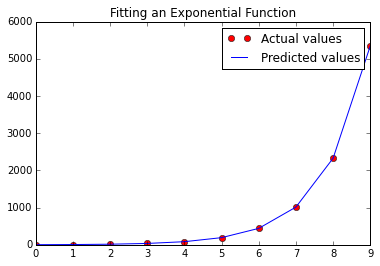

In [3]:
#Page 220, Figure 15.8
import math

#define an arbitrary exponential function
def f(x):
    return 3*(2**(1.2*x))

def createExpData(f, xVals):
    """Asssumes f is an exponential function of one argument
                xVals is an array of suitable arguments for f
       Returns array containing results of applying f to the
               elements of xVals"""
    yVals = []
    for i in range(len(xVals)):
        yVals.append(f(xVals[i]))
    return pylab.array(xVals), pylab.array(yVals)

def fitExpData(xVals, yVals):
    """Assumes xVals and yVals arrays of numbers such that
         yVals[i] == f(xVals[i])
       Returns a, b, base such that log(f(x), base) == ax + b"""
    logVals = []
    for y in yVals:
        logVals.append(math.log(y, 2.0)) #get log base 2
    a,b = pylab.polyfit(xVals, logVals, 1)
    return a, b, 2.0

xVals, yVals = createExpData(f, range(10))
pylab.plot(xVals, yVals, 'ro', label = 'Actual values')
a, b, base = fitExpData(xVals, yVals)

predictedYVals = []
for x in xVals:
    predictedYVals.append(base**(a*x + b))
pylab.plot(xVals, predictedYVals, label = 'Predicted values')
pylab.title('Fitting an Exponential Function')
pylab.legend()

#Look at a value for x not in original data
print('f(20) =', f(20))
print('Predicted f(20) =', base**(a*20 + b))


This method of using `polyfit` to find a model for data works when the relationship can be described by an equation of the form:

$y = base^{ax+b}$

 If used on  data that <b>cannot be described this way<b>, it will yield erroneous results

f(20) = 50331668.0
Predicted f(20) = 44846543.4909


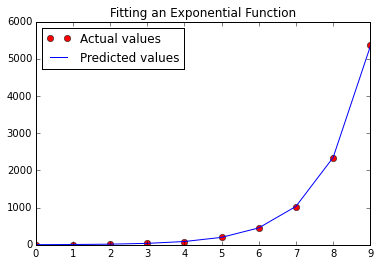

In [8]:
#define an arbitrary exponential function
# cannot be described y=b^(ax+b)
def f(x):
    return 3*(2**(1.2*x))+x

def createExpData(f, xVals):
    """Asssumes f is an exponential function of one argument
                xVals is an array of suitable arguments for f
       Returns array containing results of applying f to the
               elements of xVals"""
    yVals = []
    for i in range(len(xVals)):
        yVals.append(f(xVals[i]))
    return pylab.array(xVals), pylab.array(yVals)

def fitExpData(xVals, yVals):
    """Assumes xVals and yVals arrays of numbers such that
         yVals[i] == f(xVals[i])
       Returns a, b, base such that log(f(x), base) == ax + b"""
    logVals = []
    for y in yVals:
        logVals.append(math.log(y, 2.0)) #get log base 2
    a,b = pylab.polyfit(xVals, logVals, 1)
    return a, b, 2.0

xVals, yVals = createExpData(f, range(10))
pylab.plot(xVals, yVals, 'ro', label = 'Actual values')
a, b, base = fitExpData(xVals, yVals)

predictedYVals = []
for x in xVals:
    predictedYVals.append(base**(a*x + b))
pylab.plot(xVals, predictedYVals, label = 'Predicted values')
pylab.title('Fitting an Exponential Function')
pylab.legend(loc = 'best')

#Look at a value for x not in original data
print('f(20) =', f(20))
print('Predicted f(20) =', base**(a*20 + b))

## 15.4 When Theory Is Missing

In an ideal world, we would run <b>a controlled experiment</b> (e.g., hang weights from a spring), study the results, and retrospectively formulate a model consistent
with those results.

Unfortunately, in many cases it is <b>impossible to run even one controlled experiment</b>

In such situations, one can <b>simulate a set of experiments</b> by dividing the existing data into <b>a training set</b> and <b>a holdout set</b>.

##### How does one choose the training set?

1. One way to do this is to <b>randomly choose the samples</b> for the training set.

2.  A related but slightly different way to check a model is to train on <b>many randomly selected subsets</b> of the original data, and see how similar the models are to one another. 

If they are quite similar, than we can feel pretty good. This  approach is known as <b>cross validation</b>. 


